# Big Data Project SBA Loans

## Importing CSV file and libraries

In [68]:
# Data handling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt

# For splitting dataset into training and test set
from sklearn.model_selection import train_test_split

#For baseline Dummy classifier
from sklearn.dummy import DummyClassifier

# For balancing the dataset SMOTE is imported
from imblearn.over_sampling import SMOTE 

# Evaluating classifiers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#For Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# For visulaization
from sklearn import tree
import seaborn as sns

# Functions for determining loss errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#Loading and displyaing Data
SBA_df = pd.read_csv('SBA_PreprocessedData.csv')
SBA_df.head()

,Unnamed: 0,State,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status
0,12,20,11,44,2006,162,2,2,1,1,0,253400,1
1,24,41,35,72,2006,126,7,1,0,1,0,137300,1
2,28,1,46,61,2006,83,18,2,0,1,0,438541,1
3,30,4,4,23,2006,84,4,1,0,1,0,51440,1
4,32,32,32,53,2006,60,3,1,0,1,0,50000,1


## Logistic Regression

In [3]:
# Defining X and y

X = SBA_df[['State','BankState','NAICS','Term','NoEmp','NewExist','FranchiseCode','UrbanRural','LowDoc','DisbursementGross']]

y = SBA_df['MIS_Status']

X.columns

Index(['State', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'FranchiseCode', 'UrbanRural', 'LowDoc', 'DisbursementGross'],
      dtype='object')

In [4]:
#Dividing the test set into a training and a test set.
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Checking if the dataset looks okay
X_train

,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
399851,4,4,62,240,2,1,0,1,0,157000
413109,16,16,53,240,7,2,0,2,0,226600
166255,38,38,56,60,1,2,0,1,0,25000
299022,1,1,72,120,1,2,0,2,0,400000
23571,2,7,44,84,2,2,0,1,0,57197
...,...,...,...,...,...,...,...,...,...,...
259178,15,1,45,120,1,2,0,1,0,79536
365838,8,48,44,45,5,1,0,1,0,120000
131932,9,7,44,84,3,2,0,1,0,25300
146867,15,6,54,84,2,1,0,1,0,254876


### Dummyclassifier for baseline

In [5]:
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum_y_pred = dum.predict(X_test)

In [6]:
# As we saw from the visualization we genereally have a higher amount of cases that suceed rather than cases that fail.
print("Accuracy on training set: {:.3f}".format(dum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dum.score(X_test, y_test)))

Accuracy on training set: 0.720
Accuracy on test set: 0.720


In [7]:
# Balance of the data is checked
sum(y)/len(y)

0.7200167734978734

In [8]:
cm = confusion_matrix(y_test, dum_y_pred)
print(cm)

[[    0 35061]
 [    0 90137]]


In [9]:
# It is assesed that the dataset need to be balanced. For this SMOTE is used
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)


In [10]:
#Checking the result
sum(y_SMOTE)/len(y_SMOTE)

0.5

In [11]:
#Making a new Train-test data set, based on the SMOTE data
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.30, random_state=42)

In [12]:
# Trying the Dummyclassifier again
dum = DummyClassifier()
dum.fit(X_train, y_train)
dum_y_pred = dum.predict(X_test)

In [13]:
# Trying the dummy classifer again
print("Accuracy on training set: {:.3f}".format(dum.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dum.score(X_test, y_test)))

Accuracy on training set: 0.500
Accuracy on test set: 0.499


## Building the classifiers

### Logistic Regresion

In [14]:
# Doing Logistic Regression. fitting the model and printing the results. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
print("Accuracy on training set: {:.3f}".format(LR.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(LR.score(X_test, y_test)))

Accuracy on training set: 0.713
Accuracy on test set: 0.713


In [41]:
# For visualizzation of different variables. Inspiration from here. Can only display one single variable at a time. https://www.statology.org/plot-logistic-regression-in-python/
#data = SBA_df

#x = data['Term']
#y = data['MIS_Status']

#sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

### Decision Tree

In [16]:
# First try iteration on Bulding a model with decision tree classifier. Setting the max_depth to 5. Fitting the model and priting the results.
DTC5 = DecisionTreeClassifier(max_depth=5) 

DTC5.fit(X_train,y_train)
DTC5_y_pred = DTC5.predict(X_test)

print("Accuracy on training set max_depth=5: {:.3f}".format(DTC5.score(X_train, y_train)))
print("Accuracy on test set max_depth=5: {:.3f}".format(DTC5.score(X_test, y_test)))

Accuracy on training set max_depth=5: 0.892
Accuracy on test set max_depth=5: 0.893


In [18]:
# Setting the max_depth to 3
DTC3 = DecisionTreeClassifier(max_depth=3) 

DTC3.fit(X_train,y_train)
DTC3_y_pred = DTC3.predict(X_test)

print("Accuracy on training set max_depth=3: {:.3f}".format(DTC3.score(X_train, y_train)))
print("Accuracy on test set max_depth=3: {:.3f}".format(DTC3.score(X_test, y_test)))

Accuracy on training set max_depth=3: 0.878
Accuracy on test set max_depth=3: 0.878


In [19]:
# Setting the max_depth to 4
DTC4 = DecisionTreeClassifier(max_depth=4) 

DTC4.fit(X_train,y_train)
DTC4_y_pred = DTC4.predict(X_test)

print("Accuracy on training set max_depth=4: {:.3f}".format(DTC4.score(X_train, y_train)))
print("Accuracy on test set max_depth=4: {:.3f}".format(DTC4.score(X_test, y_test)))

Accuracy on training set max_depth=4: 0.878
Accuracy on test set max_depth=4: 0.878


In [21]:
# Second iteration. Max_depth = 9.
DTC9 = DecisionTreeClassifier(max_depth=9) 

DTC9.fit(X_train,y_train)
DTC9_y_pred = DTC9.predict(X_test)

print("Accuracy on training set max_depth=9: {:.3f}".format(DTC9.score(X_train, y_train)))
print("Accuracy on test set max_depth=9: {:.3f}".format(DTC9.score(X_test, y_test)))

Accuracy on training set max_depth=9: 0.918
Accuracy on test set max_depth=9: 0.917


In [22]:
# Second iteration. Max_depth = 8. Seems optimal since training and test set gives the same high accuracy
DTC8 = DecisionTreeClassifier(max_depth=8) 

DTC8.fit(X_train,y_train)
DTC8_y_pred = DTC8.predict(X_test)

print("Accuracy on training set max_depth=8: {:.3f}".format(DTC8.score(X_train, y_train)))
print("Accuracy on test set max_depth=8: {:.3f}".format(DTC8.score(X_test, y_test)))

Accuracy on training set max_depth=8: 0.911
Accuracy on test set max_depth=8: 0.911


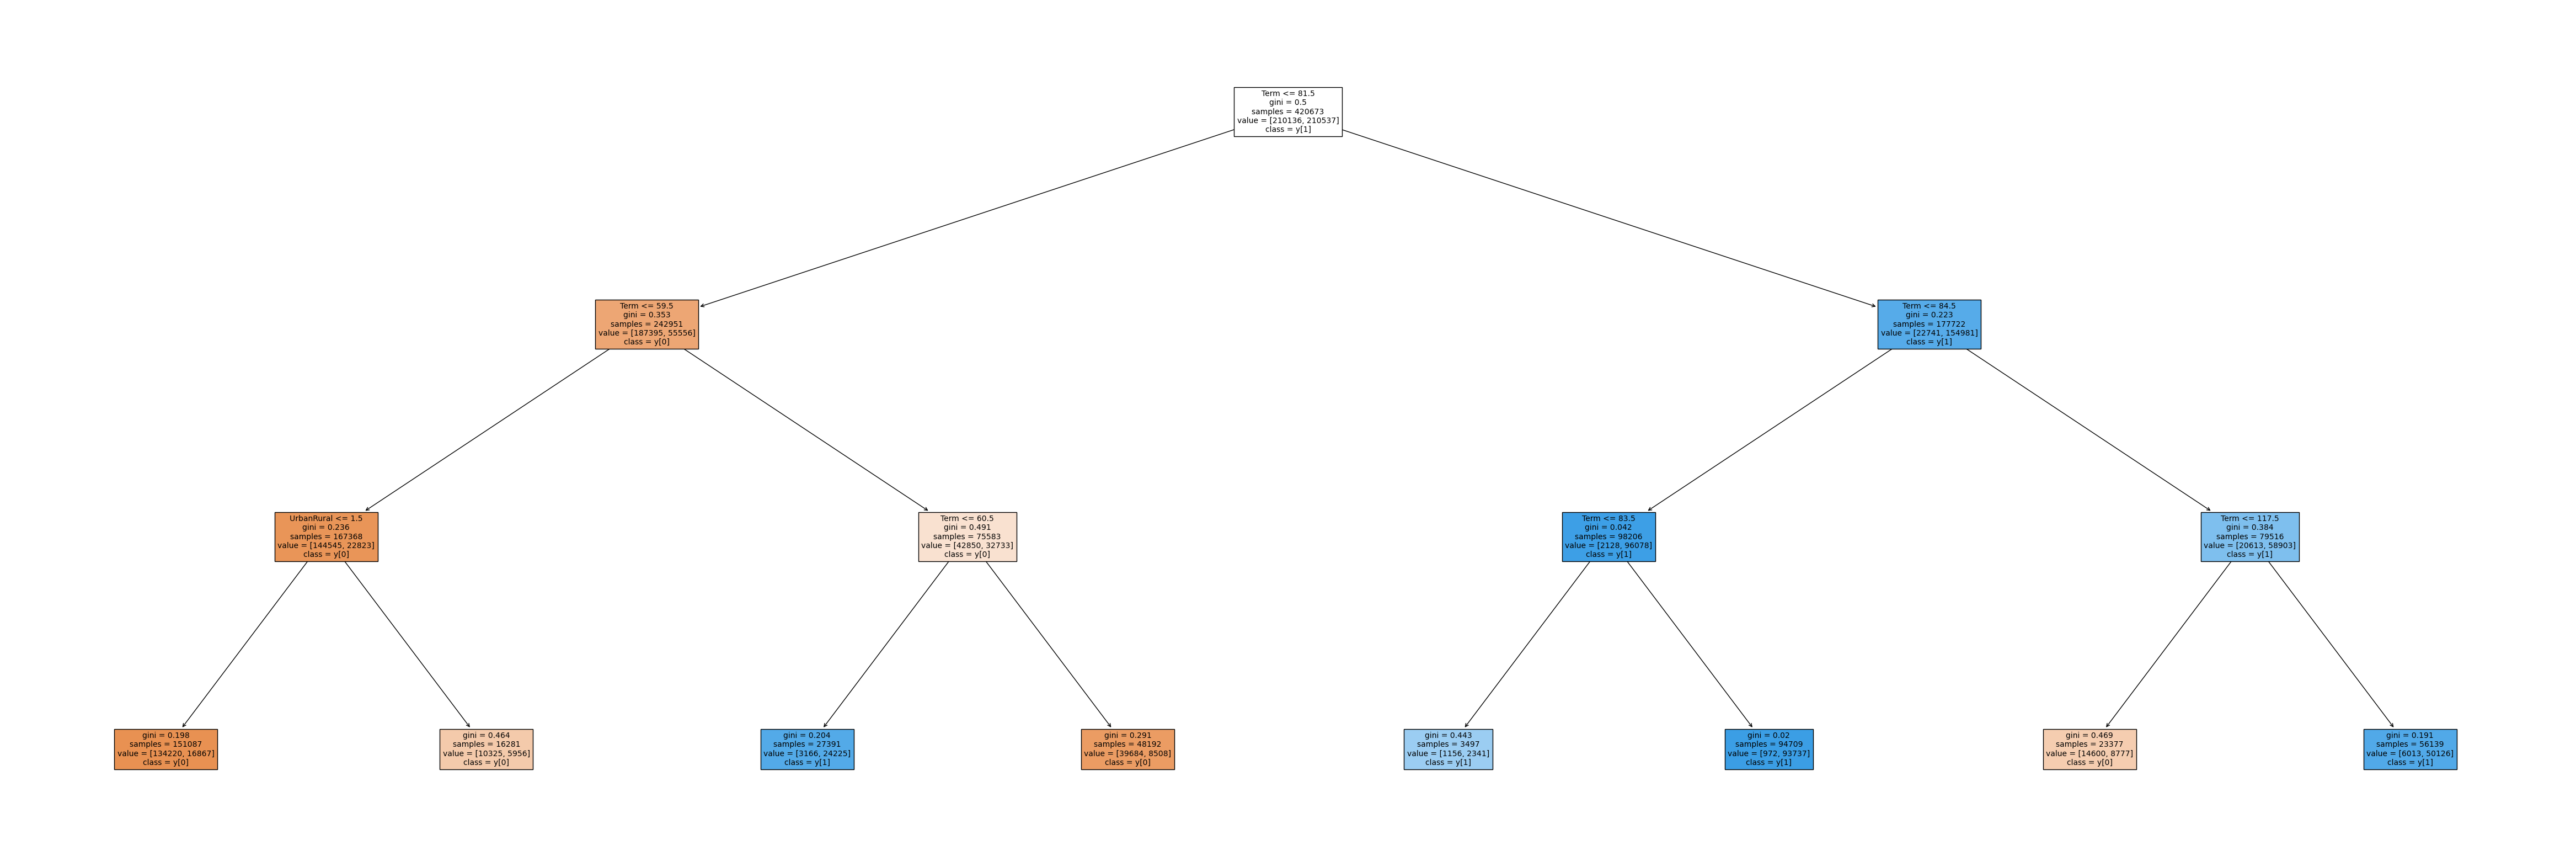

In [28]:
# Showing a figure of the Decision tree. Multiple iteration with different Max_depth values. PNG´s are saved in folder
plt.figure(figsize=(60,20))
tree.plot_tree(DTC3, #Refers to the variable defined earlier
               class_names=True, #
               feature_names=list(X_train.columns), # The columns from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('DecisionTree3_tree.png', bbox_inches='tight') # save plot as png file. It is saved into the same folder as the excercises

In [ ]:
# Grid search for Decision tree. Importing of grid search is in the top
# https://vitalflux.com/decision-tree-hyperparameter-tuning-grid-search-example/
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [ 2, 3, 4, 9]
}
#
# Create gridsearch instance
#
grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)
#
# Fit the model
#
grid.fit(X_train, y_train)
#
# Assess the score
#
grid.best_score_, grid.best_params_

### K Nearest Neighbor

In [45]:
# implement a KNN classifier here. Continuing with N=5
#KNC5 = KNeighborsClassifier(n_neighbors=5)
#KNC5.fit(X_train, y_train)
#KNC5_y_pred = KNC5.predict(X_test)
#print("Accuracy on training set N=5: {:.3f}".format(KNC5.score(X_train, y_train)))
#print("Accuracy on test set N=5: {:.3f}".format(KNC5.score(X_test, y_test)))

Accuracy on training set N=5: 0.906
Accuracy on test set N=5: 0.863


In [51]:
# implement a KNN classifier here. Continuing with New N
#KNC20 = KNeighborsClassifier(n_neighbors=20)
#KNC20.fit(X_train, y_train)
#KNC20_y_pred = KNC20.predict(X_test)
#print("Accuracy on training set N=20: {:.3f}".format(KNC20.score(X_train, y_train)))
#print("Accuracy on test set N=20: {:.3f}".format(KNC20.score(X_test, y_test)))

Accuracy on training set N=20: 0.847
Accuracy on test set N=20: 0.831


In [53]:
# implement a KNN classifier here. Continuing with New N
KNC100 = KNeighborsClassifier(n_neighbors=100)
KNC100.fit(X_train, y_train)
KNC100_y_pred = KNC100.predict(X_test)
print("Accuracy on training set N=100: {:.3f}".format(KNC100.score(X_train, y_train)))
print("Accuracy on test set N=100: {:.3f}".format(KNC100.score(X_test, y_test)))

Accuracy on training set N=100: 0.783
Accuracy on test set N=100: 0.777


In [54]:
# implement a KNN classifier here. Continuing with New N
#KNC150 = KNeighborsClassifier(n_neighbors=150)
#KNC150.fit(X_train, y_train)
#KNC150_y_pred = KNC150.predict(X_test)
#print("Accuracy on training set N=150: {:.3f}".format(KNC150.score(X_train, y_train)))
#print("Accuracy on test set N=150: {:.3f}".format(KNC150.score(X_test, y_test)))

Accuracy on training set N=150: 0.763
Accuracy on test set N=150: 0.757


In [55]:
# implement a KNN classifier here. Continuing with New N
#KNC125 = KNeighborsClassifier(n_neighbors=125)
#KNC125.fit(X_train, y_train)
#KNC125_y_pred = KNC125.predict(X_test)
#print("Accuracy on training set N=125: {:.3f}".format(KNC125.score(X_train, y_train)))
#print("Accuracy on test set N=125: {:.3f}".format(KNC125.score(X_test, y_test)))

Accuracy on training set N=125: 0.773
Accuracy on test set N=125: 0.767


In [57]:
# implement a KNN classifier here. Continuing with New N
#KNC80 = KNeighborsClassifier(n_neighbors=80)
#KNC80.fit(X_train, y_train)
#KNC80_y_pred = KNC80.predict(X_test)
#print("Accuracy on training set N=80: {:.3f}".format(KNC80.score(X_train, y_train)))
#print("Accuracy on test set N=80: {:.3f}".format(KNC80.score(X_test, y_test)))

Accuracy on training set N=80: 0.793
Accuracy on test set N=80: 0.786


In [ ]:
# Implementing Grid search to find the optimal K nearest neighbor. Importings in the top. https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [5, 20, 100, 150], # Based on the initial iterations, params are set to be 5, 20, 100 and 150.
         'knn__weights': ['uniform', 'distance'], 
         'knn__leaf_size': [30]}] #Standard Leaf size is 30
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_



In [ ]:
# Score of the Grid search
gs_knn.score(X_train, y_train)

## Looking on the models

### Dummy test

In [67]:
# Getting the classification report for the dummy set. Setting zero division so that it does not divide with zero and then return an error. https://stackoverflow.com/questions/66022943/how-to-fix-this-classification-report-warning
print(classification_report(y_test, dum_y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     90345
           1       0.50      1.00      0.67     89944

    accuracy                           0.50    180289
   macro avg       0.25      0.50      0.33    180289
weighted avg       0.25      0.50      0.33    180289



### Logistic Regression Report

In [62]:
# Getting the classification report for the logistic regression model
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     90345
           1       0.70      0.74      0.72     89944

    accuracy                           0.71    180289
   macro avg       0.71      0.71      0.71    180289
weighted avg       0.71      0.71      0.71    180289



### Decision Tree Report

In [64]:
# Getting the classification report for the Decision Tree model
print(classification_report(y_test, DTC3_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     90345
           1       0.94      0.81      0.87     89944

    accuracy                           0.88    180289
   macro avg       0.89      0.88      0.88    180289
weighted avg       0.89      0.88      0.88    180289



### K Nearest Neighbor

In [65]:
# Getting the classification report for the K Nearest Neighbor model
print(classification_report(y_test, KNC100_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     90345
           1       0.80      0.74      0.77     89944

    accuracy                           0.78    180289
   macro avg       0.78      0.78      0.78    180289
weighted avg       0.78      0.78      0.78    180289

